# Pandas and Numpy: 2 Dimensional Data

Both Numpy and Pandas offer data structures that you can use to work with 2 Dimensional data organized into rows and columns.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Numpy 2D Arrays

Numpy offers the 2D Array data structure to store 2 dimensional data. In python you would store 2D data as a list of lists, however Numpy offers 2D Arrays to store such data. This is more memory efficient than a list of lists. Data is accessed using the row and column index `array[<row>, <col>]`. You can also use the slice operator to calculate ranges of data `array[1, :]` (second row).

In [19]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [0, 0, 2, 5, 0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [95, 229, 255, 496, 201],
    [2, 0, 1, 27, 0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

# Change False to True for each block of code to see what it does

# Accessing elements
if False:
    print(ridership[1, 3])
    print(ridership[1:3, 3:5])
    print(ridership[1, :])

# Vectorized operations on rows or columns
if False:
    print(ridership[0, :] + ridership[1, :])
    print(ridership[:, 0] + ridership[:, 1])

# Vectorized operations on entire arrays
if True:
    a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    #print(a * b)
    
    print(ridership.max(axis=1))

[   5 3877 6461 4787 4802 4979  496   27 4174 4665]


#### Exercise
Write a function that, given a 2D array of subway stations and ridership, calculates the mean ridership for the station with the most number of riders in the first day and the overall ridership mean on the entire data set.

In [4]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.

    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    pass

mean_riders_for_max_station(ridership)

### Numpy Axis

Numpy array operations take in an `axis` operation that specifies the axis (row or column) along which the operation should be performed.

As an example, for the ridership array in the previous example, in order to calculate the mean ridership for each station you would pass `axis=0` (column-wise) to the mean function. Similarly to calculate the mean ridership for each date (row-wise) you would pass `axis=1`

```python
mean_rides_per_station = ridership.mean(axis=0)
mean_rides_per_day = ridership.mean(axis=1)
```

### Limitations
Numpy 2-D Arrays are not designed to handle data where with the columns are of different data types. For the case where you have a 2D Numpy array with a column of ints, a column of Strings and a column of Dates, all of the data will be converted to the String data type, and math operations like `mean()` will not work as expected.

## Pandas DataFrames

A DataFrame is a data structure from the Pandas library that is used to hold 2-Dimensional data. Like Series and 1-D Numpy arrays, Pandas DataFrames offer the same operations that a 2-D Numpy array does, but DataFrames are much more powerful due to the additional operations that they offer. 

A DataFrame is a collection of Pandas Series where each Series represents a column of data in the dataframe and can be assumed to be of a different data type. Thus a DataFrame does not have the limitation of requring all columns to be of the same data type, and a DataFrame applies math operations only to the numerical series contained within it.

In [21]:
data = pd.DataFrame({
    'account_key': [1, 2, 3, 4, 5],
    'status': ['canceled', 'cancelled', 'cancelled', 'cancelled', 'cancelled'],
    'join_date': ['2016-10-02', '2016-12-21', '2016-12-22', '2016-12-23','2016-12-23'],
    'days_to_cancel': [10, 12, 13, 14, 15]
}, index=[
    'First', 'Second', 'Third', 'Fourth', 'Fifth'
])

data
# print(data.mean())

,account_key,status,join_date,days_to_cancel
First,1,canceled,2016-10-02,10
Second,2,cancelled,2016-12-21,12
Third,3,cancelled,2016-12-22,13
Fourth,4,cancelled,2016-12-23,14
Fifth,5,cancelled,2016-12-23,15


### Accessing Data

Data in a data frame can be accessed using position based integer values or index based associative values (similar to Pandas Series) using iloc and loc respectively

Take a look at the examples below to get an idea.


In [31]:
data = pd.DataFrame(data=ridership,
                    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
                           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
                    columns=['GOOG', 'AAPL', 'R005', 'R006', 'R007']
                    )
data

,GOOG,AAPL,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [62]:
# Accessing rows
if False:
    print(data.iloc[3])  # Position Based
    print(data.loc['05-10-11'])  # Index Based

# Accessing multiple rows
if False:
    print(data.iloc[1:4])

# Accessing individual elements
if False:
#     print(data.iloc[0, 3])  # Position Based (row, col)
    print(data.loc[:, 'R006'])  # Index and column name based (row, col)

# Accessing individual columns using column names
if False:
    print(data['R005'])

# Accessing multiple columns
if False:
    print(data[[0, 3]])
    print(data[['R005', 'R004']])

# Accessing values in the dataframe
if False:
    print(data.values)  # Returns a 2D Numpy Array

# Pandas Axis
if True:
    print(data.mean(axis=0))  # Math aggregation operations work column-wise by default
    print(data.sum(axis=1))  # To switch them to row-wise
    
# data

GOOG    1071.2
AAPL    2814.9
R005    2718.8
R006    3239.9
R007    1868.2
dtype: float64
05-01-11        7
05-02-11    13896
05-03-11    18844
05-04-11    16178
05-05-11    17524
05-06-11    17082
05-07-11     1276
05-08-11       30
05-09-11    15201
05-10-11    17092
dtype: int64


### Exercise

Do the same exercise to calculate the mean ridership for the station with the most riders on the first day and the overall mean, but this time using dataframes instead of pandas.

In [71]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. 
    Use argmax() on the row to get the name of the column that has the maximum value in that row.
    Also return the mean ridership overall for comparision.
    '''
    print(ridership.iloc[0])
    print(ridership.iloc[0].argmax())
    print(ridership[ridership.iloc[0].argmax()].mean())


# mean_riders_for_max_station(data)

data

,GOOG,AAPL,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


### Reading in Data into a DataFrame

A DataFrame, being 2-Dimensional data structure is very suitable to load data from .csv or excel files. You would use the `read_csv` function to load in data into the DataFrame. Once read, there are a lot of convenient methods you can call on the returned Pandas DataFrame object.

In [77]:
daily_engagement = pd.read_csv('../../resources/daily_engagement.csv')

# View the read in values for the first 10 rows
daily_engagement.head(10)

# Get the values in the acct column
daily_engagement['acct']

# Get the number of unique values of acct
len(daily_engagement['acct'].unique())

1237

### Exercise

Calculate the correlation between two data sets using the Pearson R measure of linear correlation. This should be done in the following steps.

 1. For each data set, standardize the data by first calculating distance of each data point from the mean in multiples of the standard deviation. `(value - mean) / std_dev`
 2. Mulitply the two standardized data sets and take the average of this product

In [78]:
# Read in data set using the read_csv.
subway_df = pd.read_csv("../../resources/nyc_subway_weather.csv")


def get_data_in_std_units(data):
    pass


def correlation(x, y):
    """
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.

    correlation = average of (x in standard units) times (y in standard units)

    Remember to pass the argument "ddof=0" to the Pandas std() function!
    """
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

correlation(rain, temp)

# rain.corr(temp)

-0.22903432248240763

### Vectorized operations

Vectorized operations in DataFrames work similar to those in Numpy Arrays, except that elements are matched up by index and column-name rather than by position. Examples of these are provided in the code snippet below

In [110]:
# Change False to True for each block of code to see what it does

# Adding DataFrames with the column names
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
    print(df1 + df2)
    
# Adding DataFrames with overlapping column names 
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
    
    print(df1)
    print(df2)
    df = (df1 + df2)
    print(df.fillna(0))

# Adding DataFrames with overlapping row indexes
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'd': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
    df = (df1 + df2)
    print(df)
    
# Adding a Series to a DataFrame
if True:
    df1 = pd.DataFrame({
        0: [1, 2, 3],
        1: [4, 5, 6],
        2: [7, 8, 9]
    })
    series = pd.Series([110, 120, 130])
    
    print(df1)
    print(series)

    # Adds the elements of the series "column-wise" to get the result.
    print(df1 + series)

    # Adds it index-wise (row-wise)
    print(df1.add(series, axis="index"))

   0  1  2
0  1  4  7
1  2  5  8
2  3  6  9
0    110
1    120
2    130
dtype: int64
     0    1    2
0  111  124  137
1  112  125  138
2  113  126  139
     0    1    2
0  111  114  117
1  122  125  128
2  133  136  139


#### Exercise

Given a dataframe that contains cumulative information on a bank balance per month, write a function that would return a data frame that displays the monthly incremental amount added to the account.

*Hint: Use the shift() function on a DataFrame to get to the previous row*

In [107]:
bank_balance = pd.DataFrame({
    'account_1': [3144312, 3144335, 3144353, 3144424, 3144594, 3144808,
                  3144895, 3144905, 3144941, 3145094, 3147483, 3148473],
    'account_2': [1088151, 1088159, 1088177, 1088231, 1088275, 1088317,
                  1088328, 1088331, 1088420, 1088753, 1093827, 1098573]
}, index=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])


def get_monthly_balance(balance):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with monthly entries and exits (entries in the
    first column, exits in the second).
    '''
    
    return (balance - balance.shift()).fillna(0)
    

# get_monthly_balance(bank_balance)
bank_balance

bank_balance.shift()

,account_1,account_2
Jan,NaN,NaN
Feb,3144312.0,1088151.0
Mar,3144335.0,1088159.0
Apr,3144353.0,1088177.0
May,3144424.0,1088231.0
Jun,3144594.0,1088275.0
Jul,3144808.0,1088317.0
Aug,3144895.0,1088328.0
Sep,3144905.0,1088331.0
Oct,3144941.0,1088420.0


#### Exercise

Run the standardize operation on a set of exam scores. The scores need to be standardized by exam as well as by student.

*Note: This is the same standardization operation shown earlier where you need to subtract each score from the mean and divide by its standard deviation. To get the student-wise result though you will need to standardize by row*

In [7]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)


def standardize(df):
    """
    Try to use vectorized operations.
    """
    pass


def standardize_rows(df):
    """
    This one is more challenging than standardizing each column. 
    Hint: You'll need to use the axis argument in the vector operations.
    """
    pass
    
standardize_rows(grades_df)

The way to remember the application of the index functions, is to think of it as a way to determine how to get the individual elements to perform the operation.

 * Math Reduce operations (sum, mean, etc): The axis will specify the dimension along which to obtain the individual elements over which to run the reduce op. So for mean with `axis="index"` you specify to get the component elements from each index and return a mean for the numbers of each index in a column --- The returns a column-wise mean. For `axis="columns"` you specify to get the elements from each column and return the row-wise mean. *This is admittedly counter-intuitive*
 * Two-Arg Vector operations (add, subtract, divide): The axis here will specify the dimension along which to match up elements for the operation. So `df1.add(series, axis="index")` specifies to match up elements of the series index-wise to the dataframe and perform a row-wise addition. `df1.add(series, axis="columns")` would mean to transpose the Series into a row and match up the elements column-wise to perform a column-wise addition.

### Custom functions

As with Series, you can run custom functions over elements of a DataFrame using the `apply` function. However there are differences in how apply works with Series and DataFrames that you need to be aware of.

#### apply
Recall that with Series, `apply` works by running a custom function over individual elements of the Series. DataFrames, though are collections of Series, where `each element` of a DataFrame represents an entire Series (column). Therefore, the `apply` function runs the custom function over each entire Series, as opposed to each individual element within each Series. The apply function does take in an `axis` parameter, which specifies whether to run the custom function column-wise or row-wise. 

Note that apply can also be used to implement a `reduce` operation: Where the provided function takes in a Series and returns a single numerical value: eg. mean(), max(). Using such a function on a 2-D DataFrame will convert it down to a 1-D Series

#### applymap
In order to run a custom function over each individual element in each Series within a DataFrame, use the `applyMap` function instead

Take a look at the examples below to see each case in action

In [120]:
df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [10, 20, 30],
    'c': [5, 10, 15]
})

# DataFrame apply
if False:
    def get_mean(series):
        return series.mean()
    
    def square(series):
        return series ** 2
    
    print(df)
    
    # Column-wise (Series-wise) application of apply: Default
    print(df.apply(square))
    
    # Row-wise apply
    print(df.apply(square, axis=1))

    # Use of apply for a reduce operation
    print(df.apply(get_mean, axis="columns"))
    

# DataFrame applymap()
if True:
    def add_one(x):
        print(type(x))
        return x + 1

    print(df.applymap(add_one))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


### Group Operations

Grouping and aggregating data is possible using the groupby call on a DataFrame object. Running groupby will return you a special type of object of type `DataFrameGroupBy` on which you can run further operations.
 * Think of the DataFrameGroupBy object as a dictionary matching the elements that your grouping on with a separate DataFrame containing only the group of rows that match that group key
 * Once you have your data grouped by keys in a `DataFrameGroupBy` object, you can then run aggregation functions on each group to get the grouped information you need (see example below)
 * `DataFrameGroupBy` provides a bunch of convenient functions that you can use to run over the groups of data. If you want to run additional custom functions, you can use `apply` as you did with dataFrames.

In [145]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'value2': values+2,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Examine DataFrame
if False:
    print(example_df)
    print("\n")

    
# Examine groups
if False:
    grouped_data = example_df.groupby('even')

    
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print(grouped_data.groups)
    print(grouped_data.sum()["value"])
    
# Group by multiple columns
if False:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print(grouped_data.groups)
    
# Get sum of each group
if False:
    grouped_data = example_df.groupby('even')
    print(grouped_data.sum())

    
# Limit columns in result
if True:
    print(example_df)
    
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print(grouped_data.sum())
    
    print('\n')     # Blank line to separate results)
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print(grouped_data['value'].sum())

   value  value2   even  above_three
a      1       3  False        False
b      3       5  False        False
c      2       4   True        False
d      4       6   True         True
e      1       3  False        False
f      6       8   True         True
g      4       6   True         True
       value  value2  above_three
even                             
False      5      11          0.0
True      16      24          3.0


even
False     5
True     16
Name: value, dtype: int64


#### Exercise

Read in the data about subway ridership and group it by a variable of your choice. Then find the mean ridership for each value and provide a plot of the mean of this group data once you are done.

In [8]:
subway_df = pd.read_csv("../../resources/nyc_subway_weather.csv")


### Joining DataFrames

DataFrames support operations that enable you to perform SQL-like joins on them. An example of this could be if you have multiple DataFrames that have related data and you want to combine them to produce some consolidated output key-ed on one of the fields --- Much like an SQL Join. To do this you would use the `merge` operation like so

```python
dataFrame1.merge(dataFrame2, on="account", how="inner")
```

This code will perform an inner join of dataFrame1 on dataFrame2 on the `account` column, producing a dataframe with the combined output *Like an inner join*. Setting how to `left`, `right` or `outer` will return a dataframe with an outer join done on the data. If you need to perform a join on multiple columns, you should provide an array of arguments to the `on` parameter.

If the columns you want to join on, are named differently in the two dataframes, you would use the `right_on` and `left_on` arguments to the merge call, instead of the single `on` parameter.

#### Exercise
Given two dataframes: One that contains ridership information and the other that contains weather info, write a function that joins the two dataframes that produces ridership and weather information for each date and location

In [158]:
import pandas as pd

subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    
    pass
    
# results = combine_dfs(subway_df, weather_df)

subway_df.merge(weather_df)

,UNIT,DATEn,ENTRIESn,EXITSn,latitude,longitude,pressurei,fog,rain,tempi,wspdi
0,R003,05-01-11,4388333,2911002,40.689945,-73.872564,30.24,0,0,52.0,8.1
1,R003,05-02-11,4388348,2911036,40.689945,-73.872564,30.32,0,0,48.9,6.9
2,R003,05-03-11,4389885,2912127,40.689945,-73.872564,30.14,0,0,54.0,3.5
3,R003,05-04-11,4391507,2913223,40.689945,-73.872564,29.98,0,0,57.2,15.0
4,R003,05-05-11,4393043,2914284,40.689945,-73.872564,30.01,0,0,48.9,15.0
5,R004,05-01-11,14656120,14451774,40.691320,-73.867135,30.24,0,0,52.0,8.1
6,R004,05-02-11,14656174,14451851,40.691320,-73.867135,30.32,0,0,48.9,6.9
7,R004,05-03-11,14660126,14454734,40.691320,-73.867135,30.14,0,0,54.0,3.5
8,R004,05-04-11,14664247,14457780,40.691320,-73.867135,29.98,0,0,57.2,15.0
9,R004,05-05-11,14668301,14460818,40.691320,-73.867135,30.01,0,0,48.9,15.0


### Plotting Data
As with Series, DataFrame objects provide a `plot` function that help you plot data within the DataFrame. If you have multiple columns in a DataFrame, calling the plot function will produce a line plot with each Series represented as a different color.

The `plot` function produces a line plot as a default. To produce other kinds of plot, you should set the value of the `kind` parameter to the appropriate values (`pie`, `scatter`, etc.)

#### Exercise
Use the subway ridership DataFrame to create one of the following plot

 * A scatter plot of latitude on the x axis and longitude on the y-axis and ridership as the bubble size

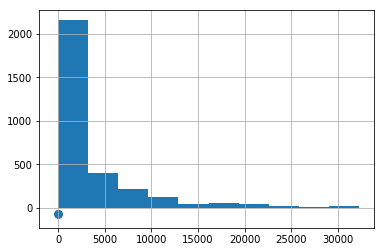

In [168]:
subway_df = pd.read_csv("../../resources/nyc_subway_weather.csv")

data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()

subway_df.groupby('DATEn')['ENTRIESn_hourly'].head(100).hist()

scaled_entries = data_by_location['ENTRIESn_hourly'] / data_by_location['ENTRIESn_hourly'].std()
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], s=scaled_entries*10)

# data_by_location.plot()